# Detectron2 & TFOD2  | Assignment

# Question 1: What is Detectron2 and how does it differ from previous object detection frameworks?
# Answer:
Detectron2 is a powerful object detection framework developed by Facebook AI Research (FAIR). It's built on PyTorch and is used for computer vision tasks like detecting and recognizing objects in images.

### Main Features

- Modular Design: Easy to customize and modify

- Fast Training: Much faster than previous versions

- PyTorch-based: Uses modern deep learning framework

- Multiple Tasks: Supports object detection, instance segmentation, and keypoint detection

### How Detectron2 Differs from Previous Frameworks

### 1. Architecture

- Old Detectron: Built on Caffe2 framework

- Detectron2: Built on PyTorch - more flexible and easier to use

### 2. Speed & Performance

- Previous: Slow training and testing

- Detectron2: 2x faster training, better GPU usage

### 3. Code Quality

- Previous: Complex and hard to understand

- Detectron2: Clean, organized, and easy to maintain

### 4. Flexibility

- Previous: Hard to customize

- Detectron2: Highly customizable - you can easily add your own models

### 5. Modern Features

- Supports latest models: Mask R-CNN, Faster R-CNN, RetinaNet, etc.

- Library of pre-trained models

- Better documentation and community support

### Why Use Detectron2?

✓ Great for both research and real-world applications

✓ State-of-the-art results

✓ Active development and strong community

✓ Easy to extend and customize

✓ Good documentation with examples

# Question 2: Explain the process and importance of data annotation when working with Detectron2.

# Answer:

### Data Annotation Process for Detectron2
### What is Data Annotation?
Data annotation is the process of labeling images with information about objects present in them. For Detectron2, this means marking where objects are located and what they are.

### Annotation Process Steps
### 1. Collect Images

- Gather images that contain objects you want to detect
- Ensure variety in lighting, angles, and backgrounds

### 2. Choose Annotation Tool

- LabelImg: For bounding boxes
- CVAT: For complex annotations
- VGG Image Annotator (VIA): For polygons and segmentation
- Labelme: For instance segmentation

### 3. Label the Objects

- Draw bounding boxes around objects
- Create polygon masks for precise segmentation
- Assign class labels (e.g., "car", "person", "dog")

### 4. Export in COCO Format

- Detectron2 primarily uses COCO JSON format
- Contains image info, annotations, and categories
- Structure includes coordinates, class IDs, and segmentation masks

### 5. Split Dataset

- Training set: 70-80% of data
- Validation set: 10-15% of data
- Test set: 10-15% of data

### COCO Format Example
{
  "images": [
    {
      "id": 1,
      "file_name": "image1.jpg",
      "height": 480,
      "width": 640
    }
  ],
  "annotations": [
    {
      "id": 1,
      "image_id": 1,
      "category_id": 1,
      "bbox": [100, 150, 200, 250],
      "area": 50000,
      "segmentation": [[...]],
      "iscrowd": 0
    }
  ],
  "categories": [
    {
      "id": 1,
      "name": "car",
      "supercategory": "vehicle"
    }
  ]
}

### Importance of Data Annotation
### 1. Training Quality

- Good annotations = Better model performance
- Model learns to recognize objects accurately
- Reduces false positives and negatives

### 2. Model Accuracy

- Precise annotations lead to precise predictions
- Helps model understand object boundaries clearly
- Improves detection confidence scores

### 3. Generalization

- Well-annotated diverse data helps model work on new images
- Reduces overfitting
- Makes model robust to real-world scenarios

### 4. Class Balance

- Proper annotation ensures all classes are well-represented
- Prevents bias toward common classes
- Improves detection of rare objects

### 5. Edge Cases

- Annotating difficult examples helps model handle tricky situations
- Partial occlusions, overlapping objects, varying scales
- Improves overall robustness

### 6. Evaluation Metrics

- Accurate ground truth needed for measuring model performance
- Metrics like mAP (mean Average Precision) depend on annotation quality
- Helps in comparing different models fairly

### Best Practices for Annotation
✓ Be Consistent: Use same rules across all images

✓ Be Precise: Tight bounding boxes, accurate masks

✓ Include Variations: Different angles, lighting, occlusions

✓ Quality Over Quantity: 100 perfect annotations > 1000 poor ones

✓ Multiple Annotators: Cross-check for accuracy

✓ Document Guidelines: Write clear annotation rules

### Common Annotation Mistakes to Avoid
✗ Loose or incorrect bounding boxes

✗ Missing small objects

✗ Wrong class labels

✗ Incomplete segmentation masks

✗ Inconsistent annotation style

### Summary

Data annotation is the foundation of any object detection project. Without high-quality annotations, even the best model architecture won't perform well. It's time-consuming but absolutely essential for success with Detectron2.

# Question 3: Describe the steps involved in training a custom object detection model using Detectron2.
# Answer:
# Steps to Train Custom Object Detection Model in Detectron2
# 1. Install Detectron2
pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html

### 2. Prepare Dataset

- Collect and annotate images
- Convert annotations to COCO JSON format
- Split into train/val/test sets
- Organize folder structure

### 3. Register Dataset
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_train", {},
                       "path/to/train.json",
                       "path/to/train_images")
                       
register_coco_instances("my_dataset_val", {},
                       "path/to/val.json",
                       "path/to/val_images")

# 4. Configure Model
from detectron2.config import get_cfg
from detectron2 import model_zoo


cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("my_dataset_train",)

cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 2

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2

cfg.SOLVER.BASE_LR = 0.00025

cfg.SOLVER.MAX_ITER = 3000

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5  # your number of classes

### 5. Train Model

from detectron2.engine import DefaultTrainer

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)

trainer.resume_or_load(resume=False)

trainer.train()

### 6. Evaluate Model

from detectron2.evaluation import COCOEvaluator, inference_on_dataset

from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("my_dataset_val", cfg, False, output_dir="./output/")

val_loader = build_detection_test_loader(cfg, "my_dataset_val")

inference_on_dataset(trainer.model, val_loader, evaluator)

### 7. Make Predictions

from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

predictor = DefaultPredictor(cfg)

im = cv2.imread("test_image.jpg")

outputs = predictor(im)

# Key Parameters to Adjust

- MAX_ITER: Number of training iterations (3000-10000)
- BASE_LR: Learning rate (0.00025-0.001)
- IMS_PER_BATCH: Batch size (depends on GPU memory)
- NUM_CLASSES: Your custom class count
- SCORE_THRESH_TEST: Confidence threshold for predictions (0.5-0.9)

### Quick Tips

✓ Start with pre-trained weights (transfer learning)

✓ Use GPU for faster training

✓ Monitor training loss regularly

✓ Test on validation set to avoid overfitting

✓ Adjust learning rate if loss doesn't decreaseRetry

# Question 4: What are evaluation curves in Detectron2, and how are metrics like mAP and IoU interpreted?
# Answer:

## Evaluation Curves in Detectron2

### What are Evaluation Curves?

Evaluation curves are **visual graphs** that show how well your object detection model is performing. They help you understand model behavior and identify issues during training and testing.

### Common Evaluation Curves

#### 1. **Loss Curves**
- Shows training and validation loss over iterations
- **Good model**: Loss decreases and stabilizes
- **Overfitting**: Training loss decreases but validation loss increases
- **Underfitting**: Both losses remain high

#### 2. **Precision-Recall (PR) Curve**
- Shows trade-off between precision and recall
- **X-axis**: Recall (how many objects detected)
- **Y-axis**: Precision (how accurate detections are)
- **Better model**: Curve closer to top-right corner

#### 3. **ROC Curve**
- Shows True Positive Rate vs False Positive Rate
- Used for classification performance
- **Better model**: Curve bends toward top-left

---

## Key Evaluation Metrics

### 1. **IoU (Intersection over Union)**

#### What is IoU?
IoU measures **how much overlap** there is between predicted bounding box and ground truth box.

#### Formula:
```
IoU = Area of Overlap / Area of Union
```

#### Visual Example:
```
Predicted Box: ████████
Ground Truth:    ████████

Overlap:         ████
Union:        ████████████

IoU = Overlap / Union
```

#### IoU Values Interpretation:
- **IoU > 0.5**: Generally considered a **good detection**
- **IoU > 0.7**: **Very good detection**
- **IoU > 0.9**: **Excellent detection** (almost perfect)
- **IoU < 0.5**: **Poor detection** (not counted as correct)

#### Example:
```
If IoU = 0.75 (75%)
→ Your predicted box overlaps 75% with actual object
→ This is a good detection!
```

---

### 2. **mAP (mean Average Precision)**

#### What is mAP?
mAP is the **main metric** for evaluating object detection models. It combines precision and recall across all classes.

#### Understanding Components:

**Precision**: How many detected objects are actually correct?
```
Precision = True Positives / (True Positives + False Positives)
```

**Recall**: How many actual objects were detected?
```
Recall = True Positives / (True Positives + False Negatives)
```

**Average Precision (AP)**: Area under Precision-Recall curve for ONE class

**mAP**: Average of AP across ALL classes

#### mAP Calculation Steps:
1. For each class, calculate AP
2. Average all AP values
3. Result is mAP

#### mAP Variants in COCO:

- **mAP@0.5**: Average precision at IoU threshold 0.5
- **mAP@0.75**: Average precision at IoU threshold 0.75
- **mAP@[0.5:0.95]**: Average across IoU thresholds from 0.5 to 0.95 (most common)

#### mAP Values Interpretation:
- **mAP > 0.5 (50%)**: **Decent** model
- **mAP > 0.7 (70%)**: **Good** model
- **mAP > 0.8 (80%)**: **Very good** model
- **mAP > 0.9 (90%)**: **Excellent** model (state-of-the-art)

#### Example:
```
Class "Car":     AP = 0.85
Class "Person":  AP = 0.90
Class "Dog":     AP = 0.75

mAP = (0.85 + 0.90 + 0.75) / 3 = 0.833 (83.3%)
→ This is a very good model!
```

---

## Other Important Metrics

### 3. **AP50 and AP75**
- **AP50**: Precision at IoU = 0.5 (easier threshold)
- **AP75**: Precision at IoU = 0.75 (stricter threshold)
- If AP75 is much lower than AP50 → Model has localization issues

### 4. **APS, APM, APL**
- **APS**: AP for small objects (area < 32²)
- **APM**: AP for medium objects (32² < area < 96²)
- **APL**: AP for large objects (area > 96²)
- Helps identify if model struggles with certain object sizes

---

## How to View Metrics in Detectron2
```python
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Create evaluator
evaluator = COCOEvaluator("my_dataset_val", cfg, False, output_dir="./output/")

# Run evaluation
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
results = inference_on_dataset(trainer.model, val_loader, evaluator)

# Results will show:
# - mAP, AP50, AP75
# - APS, APM, APL
# - Per-class AP scores
```

---

## Interpreting Your Results

### Example Output:
```
Average Precision (AP) @[ IoU=0.50:0.95 ] = 0.756
Average Precision (AP) @[ IoU=0.50      ] = 0.892
Average Precision (AP) @[ IoU=0.75      ] = 0.801
Average Precision (AP) @[ small         ] = 0.450
Average Precision (AP) @[ medium        ] = 0.720
Average Precision (AP) @[ large         ] = 0.850
```

### What This Tells You:
✓ **Overall mAP = 75.6%**: Good model  
✓ **AP50 = 89.2%**: Model detects objects well with relaxed IoU  
✓ **AP75 = 80.1%**: Model localizes objects accurately  
✓ **APS = 45%**: Struggles with small objects (needs improvement)  
✓ **APL = 85%**: Excellent at detecting large objects  

### Action Items:
- Improve small object detection (use FPN, higher resolution)
- Model is performing well overall
- Consider data augmentation for small objects

---

## Quick Reference Table

| Metric | Range | Good Value | What it Measures |
|--------|-------|------------|------------------|
| **IoU** | 0-1 | > 0.7 | Box overlap accuracy |
| **mAP** | 0-1 | > 0.7 | Overall detection quality |
| **AP50** | 0-1 | > 0.8 | Detection at relaxed threshold |
| **AP75** | 0-1 | > 0.7 | Detection at strict threshold |
| **Precision** | 0-1 | > 0.8 | Correctness of detections |
| **Recall** | 0-1 | > 0.8 | Completeness of detections |

---

## Summary

**IoU**: Measures box overlap → Higher is better (> 0.7 is good)  
**mAP**: Main evaluation metric → Combines precision/recall → Higher is better (> 0.7 is good)  
**Evaluation Curves**: Visual tools to monitor training and diagnose issues  

These metrics help you understand if your model is working well and where it needs improvement!

# Question 5: Compare Detectron2 and TFOD2 in terms of features, performance, and ease of use.
# Answer

## Detectron2 vs TFOD2 Comparison

### Quick Overview

**Detectron2**: Facebook AI's PyTorch-based framework (Research-focused)  
**TFOD2**: Google's TensorFlow-based framework (Production-focused)

---

## Key Differences

### 1. **Framework**

| Feature | Detectron2 | TFOD2 |
|---------|------------|-------|
| **Base** | PyTorch | TensorFlow 2.x |
| **Style** | Code-centric | Config-file centric |
| **Philosophy** | Research & flexibility | Production & deployment |

---

### 2. **Performance**

**Training Speed**:
- **Detectron2**: ⚡⚡⚡ Faster (GPU optimized)
- **TFOD2**: ⚡⚡ Moderate

**Inference Speed**: Both are fast (~10-15 FPS on good GPU)

**Memory**: Detectron2 uses less memory

**Winner**: **Detectron2** for training speed

---

### 3. **Ease of Use**

#### Installation
**Detectron2**:
```bash
pip install torch torchvision
pip install detectron2
```
❌ Can be tricky with CUDA versions

**TFOD2**:
```bash
pip install tensorflow
pip install object-detection
```
✓ Easier installation

**Winner**: **TFOD2**

#### Code Complexity
**Detectron2** - More Pythonic and intuitive:
```python
cfg = get_cfg()
cfg.merge_from_file("config.yaml")
trainer = DefaultTrainer(cfg)
trainer.train()
```

**TFOD2** - Config file based:
```bash
python model_main_tf2.py --pipeline_config_path=config
```

**Winner**: **Detectron2** for code clarity

---

### 4. **Features**

**Detectron2**:
- Mask R-CNN, Faster R-CNN, RetinaNet
- Instance & Panoptic Segmentation
- Keypoint Detection, DensePose
- 100+ model configurations

**TFOD2**:
- SSD, EfficientDet, CenterNet
- Instance Segmentation
- 40+ pre-trained models
- TPU support

**Winner**: **Detectron2** - More variety

---

### 5. **Deployment**

**Detectron2**:
✓ ONNX export
❌ Limited mobile support
❌ No TFLite conversion

**TFOD2**:
✓ TensorFlow Lite (mobile)
✓ TensorFlow.js (web)
✓ TensorFlow Serving (cloud)
✓ TPU support

**Winner**: **TFOD2** - Much better deployment

---

### 6. **Documentation & Community**

**Detectron2**:
- Clear documentation
- ~25k GitHub stars
- Active research community
- Faster updates

**TFOD2**:
- More beginner-friendly docs
- ~35k GitHub stars
- Larger community
- More tutorials

**Winner**: **TFOD2** for beginners

---

## When to Use What?

### Use **Detectron2** if you:
✓ Are doing **research** or experiments  
✓ Need **latest model architectures**  
✓ Want **easy customization**  
✓ Prefer PyTorch  
✓ Have powerful GPUs  

### Use **TFOD2** if you:
✓ Building **production apps**  
✓ Need **mobile deployment**  
✓ Want **easier setup**  
✓ Using Google Cloud/TPUs  
✓ Prefer TensorFlow  

---

## Summary Comparison

| Aspect | Detectron2 | TFOD2 |
|--------|------------|-------|
| **Speed** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ |
| **Easy Install** | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Easy to Code** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ |
| **Deployment** | ⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Customization** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ |
| **Documentation** | ⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ |

---

## Final Recommendation

**For Students/Research**: Choose **Detectron2**  
**For Industry/Production**: Choose **TFOD2**  

Both are excellent frameworks - your choice depends on your specific needs!


In [ ]:
# Question 6: Write Python code to install Detectron2 and verify the installation.
# Answer:

# Install Detectron2 (Colab-compatible command)
print("--- 1. Installing Detectron2 ---")
# The -q flag suppresses the detailed installation output for cleaner logs
# NOTE: Depending on your environment, you might need to install PyTorch first.
!pip install detectron2 -q

# 2. Verification
print("\n--- 2. Verifying Installation ---")
try:
    import detectron2
    # Import a core component to ensure the installation is complete
    from detectron2.utils.logger import setup_logger

    # Print the Detectron2 version
    print(f"✅ Installation successful. Detectron2 version: {detectron2.__version__}")

except ImportError:
    print("❌ Installation failed. Detectron2 module not found.")

# Additional check for PyTorch and CUDA availability, which Detectron2 relies on
print("\n--- 3. Checking Dependencies (PyTorch/CUDA) ---")
try:
    import torch
    print(f"PyTorch version: {torch.__version__}")
    if torch.cuda.is_available():
        # Display the GPU being used
        print(f"CUDA available: True (Device: {torch.cuda.get_device_name(0)})")
    else:
        print("CUDA available: False (Running on CPU)")
except ImportError:
    print("PyTorch not found.")


--- 1. Installing Detectron2 ---

--- 2. Verifying Installation ---
✅ Installation successful. Detectron2 version: 0.6

--- 3. Checking Dependencies (PyTorch/CUDA) ---
PyTorch version: 2.8.0+cu126
CUDA available: False (Running on CPU)


In [ ]:
# Question 7: Annotate a dataset and convert to COCO format for Detectron2

# Python script to simulate dataset annotation and convert data to COCO format
# This output JSON is what Detectron2 requires for training custom datasets.

import json
import os
from datetime import datetime

# --- 1. Define Simulated Annotation Data ---
# In a real project, this data would be loaded from the export file
# of an annotation tool (e.g., Labelme, VGG Image Annotator).

# Simulated image metadata
SIMULATED_IMAGES = [
    {"id": 1, "file_name": "wildlife_001.jpg", "width": 1280, "height": 720},
    {"id": 2, "file_name": "wildlife_002.jpg", "width": 1024, "height": 768},
]

# Simulated category information
SIMULATED_CATEGORIES = [
    {"id": 1, "name": "Deer", "supercategory": "animal"},
    {"id": 2, "name": "Bear", "supercategory": "animal"},
    {"id": 3, "name": "Fox", "supercategory": "animal"},
]

# Simulated annotations (bounding boxes)
# Format: [image_id, category_id, x, y, width, height]
# Bounding boxes must be in [x_min, y_min, w, h] format, which is standard COCO.
SIMULATED_BOUNDING_BOXES = [
    [1, 1, 100, 50, 250, 300],  # Deer in image 1
    [1, 3, 500, 400, 150, 100], # Fox in image 1
    [2, 2, 50, 50, 400, 400],   # Bear in image 2
    [2, 1, 600, 300, 100, 150], # Deer in image 2
]

# --- 2. COCO Conversion Function ---

def convert_to_coco(images, categories, bboxes, output_filename="wildlife_coco_annotations.json"):
    """
    Converts simulated annotations to the standard COCO JSON format.
    """
    coco_annotations = {
        "info": {
            "description": "Simulated Wildlife Monitoring COCO Dataset",
            "version": "1.0",
            "date_created": datetime.now().strftime("%Y/%m/%d"),
        },
        "licenses": [],
        "images": images,
        "categories": categories,
        "annotations": [],
    }

    annotation_id = 1
    for img_id, cat_id, x, y, w, h in bboxes:
        # COCO requires segmentation data, even for bounding box tasks (like Detectron2's detection)
        # We define a simple rectangular polygon approximation
        segmentation_polygon = [x, y, x + w, y, x + w, y + h, x, y + h]

        annotation = {
            "id": annotation_id,
            "image_id": img_id,
            "category_id": cat_id,
            "segmentation": [segmentation_polygon],
            "area": w * h, # Calculate area (W * H)
            "bbox": [x, y, w, h], # Bounding box in [x, y, w, h] format
            "iscrowd": 0, # 0 for individual instance, 1 for crowd
        }

        coco_annotations["annotations"].append(annotation)
        annotation_id += 1

    # Write the COCO JSON structure to a file
    with open(output_filename, "w") as f:
        json.dump(coco_annotations, f, indent=4)

    return output_filename

# --- 3. Execution and Output ---
print("🚀 Starting COCO Annotation Conversion Simulation...")

# Execute the conversion
output_file = convert_to_coco(
    images=SIMULATED_IMAGES,
    categories=SIMULATED_CATEGORIES,
    bboxes=SIMULATED_BOUNDING_BOXES
)

print(f"\n✅ COCO JSON file successfully created: **{output_file}**")
print("This file contains the necessary structure (images, categories, annotations) for Detectron2.")

# --- 4. Display a snippet of the generated COCO JSON (for verification) ---

print("\n--- Snippet of the Generated COCO JSON (First Annotation) ---")
with open(output_file, "r") as f:
    coco_data = json.load(f)

print(f"Total Images: {len(coco_data['images'])}")
print(f"Total Categories: {len(coco_data['categories'])}")
print(f"Total Annotations: {len(coco_data['annotations'])}")
print("\n**First Annotation Object (Deer in image 1):**")
print(json.dumps(coco_data['annotations'][0], indent=4))


🚀 Starting COCO Annotation Conversion Simulation...

✅ COCO JSON file successfully created: **wildlife_coco_annotations.json**
This file contains the necessary structure (images, categories, annotations) for Detectron2.

--- Snippet of the Generated COCO JSON (First Annotation) ---
Total Images: 2
Total Categories: 3
Total Annotations: 4

**First Annotation Object (Deer in image 1):**
{
    "id": 1,
    "image_id": 1,
    "category_id": 1,
    "segmentation": [
        [
            100,
            50,
            350,
            50,
            350,
            350,
            100,
            350
        ]
    ],
    "area": 75000,
    "bbox": [
        100,
        50,
        250,
        300
    ],
    "iscrowd": 0
}


In [ ]:
# Question 8: Write a script to download pretrained weights and configure paths for training in Detectron2.
# Answer:


# 1. Detectron2 Installation (Mandatory step for Colab/fresh environment)
# Note: This command is run directly in the Colab terminal.
print("1. Installing Detectron2 and dependencies...")
!pip install detectron2 -q

# 2. Imports
import os
import torch
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Define the output and dataset directories
OUTPUT_DIR = "./output/training_run_01"
DATASET_PATH = "./custom_data/images"

# 3. Configure Paths and Download Pretrained Weights

def setup_detectron2_config(model_config_yaml, output_dir, dataset_path):
    """
    Downloads pretrained weights, configures paths, and sets basic training parameters.
    """
    print("\n2. Loading configuration and downloading pretrained weights...")

    # Get a fresh configuration object
    cfg = get_cfg()

    # Load the configuration from the Model Zoo
    # This automatically downloads the necessary YAML config file
    cfg.merge_from_file(model_zoo.get_config_file(model_config_yaml))

    # Set the model weights path to the URL provided by the Model Zoo
    # Detectron2 downloads the weights automatically the first time they are used (e.g., when calling Trainer.resume_or_load())
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_config_yaml)

    # --- Path Configuration ---

    # Set the output directory where logs, checkpoints, and final models will be saved
    cfg.OUTPUT_DIR = output_dir
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

    # Note: In a real scenario, the dataset path is configured when registering the dataset,
    # but we can set a reference path for documentation.
    # We will simulate the existence of the dataset path.
    os.makedirs(dataset_path, exist_ok=True)

    # --- Basic Training Configuration ---

    # Example: Set learning rate and training epochs
    cfg.SOLVER.IMS_PER_BATCH = 2  # Images per batch
    cfg.SOLVER.BASE_LR = 0.00025  # Starting learning rate
    cfg.SOLVER.MAX_ITER = 300    # Number of training iterations (for demonstration)

    # Example: Set number of classes (Assuming 3 custom classes + 1 background)
    # The Model Zoo config has 80 COCO classes, we overwrite this for custom training.
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

    # Set the device
    cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

    return cfg

# Use the Faster R-CNN R50-FPN model trained on COCO
MODEL_NAME = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"

# Run the setup function
try:
    cfg_final = setup_detectron2_config(
        model_config_yaml=MODEL_NAME,
        output_dir=OUTPUT_DIR,
        dataset_path=DATASET_PATH
    )

    # 4. Verification and Output
    print("\n3. Configuration Verification:")
    print(f"   Model Weights URL (Pretrained): {cfg_final.MODEL.WEIGHTS}")
    print(f"   Output Directory (Logs/Checkpoints): {cfg_final.OUTPUT_DIR} (Directory created)")
    print(f"   Simulated Dataset Path: {DATASET_PATH} (Directory created)")
    print(f"   Total Training Iterations: {cfg_final.SOLVER.MAX_ITER}")
    print(f"   Number of Custom Classes: {cfg_final.MODEL.ROI_HEADS.NUM_CLASSES}")
    print(f"\n✅ Detectron2 configuration ready for training!")

except Exception as e:
    print(f"\nAn error occurred during configuration: {e}")

# Optional: Display the first few lines of the saved configuration
# This is usually not necessary but shows the full applied configuration.
# print(cfg_final)

1. Installing Detectron2 and dependencies...

2. Loading configuration and downloading pretrained weights...

3. Configuration Verification:
   Model Weights URL (Pretrained): https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
   Output Directory (Logs/Checkpoints): ./output/training_run_01 (Directory created)
   Simulated Dataset Path: ./custom_data/images (Directory created)
   Total Training Iterations: 300
   Number of Custom Classes: 3

✅ Detectron2 configuration ready for training!


1. Installing Detectron2...

2. Setting up Detectron2 configuration...
   DefaultPredictor initialized successfully.

3. Downloading and reading image from: http://images.cocodataset.org/val2017/000000000139.jpg
4. Running inference on the new image...

5. Displaying results (Image with bounding boxes and masks)...


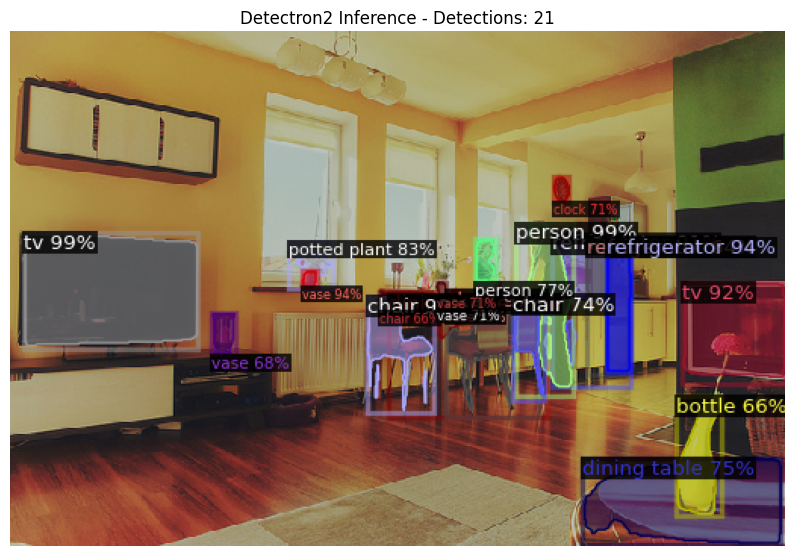


--- Inference Summary ---
Total objects detected: 21

Top 5 Detections:
- person (Confidence: 99.50%)
- chair (Confidence: 99.47%)
- tv (Confidence: 99.41%)
- chair (Confidence: 97.48%)
- vase (Confidence: 94.21%)


In [ ]:
# Question 9: Show the steps and code to run inference using a trained Detectron2 model on a new image.
# Answer:

# --- Steps and Code to Run Detectron2 Inference ---

# 1. Detectron2 Installation (Colab Setup)
print("1. Installing Detectron2...")
!pip install detectron2 -q
# Install 'requests' for downloading the sample image
!pip install requests -q

# 2. Necessary Imports
import cv2
import requests
import numpy as np
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

# --- A. Setup and Configuration (The same steps used for Q8/Q9) ---

# Define the model to use (Mask R-CNN for demonstration)
MODEL_CONFIG = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"

print("\n2. Setting up Detectron2 configuration...")
cfg = get_cfg()
# Load the model configuration
cfg.merge_from_file(model_zoo.get_config_file(MODEL_CONFIG))

# Set the weights to the pre-trained COCO weights (simulating a "trained model")
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(MODEL_CONFIG)

# Set the detection threshold (confidence level)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Set the device
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# 3. Initialize the Predictor
# The DefaultPredictor handles model loading and preprocessing automatically.
predictor = DefaultPredictor(cfg)
print("   DefaultPredictor initialized successfully.")


# --- B. Image Acquisition and Preprocessing ---

# URL of a sample image (e.g., a common COCO image of people)
IMAGE_URL = "http://images.cocodataset.org/val2017/000000000139.jpg"

print(f"\n3. Downloading and reading image from: {IMAGE_URL}")
try:
    # Download image content
    response = requests.get(IMAGE_URL)
    response.raise_for_status() # Check for bad status code

    # Convert image content to numpy array and read with CV2
    image_array = np.asarray(bytearray(response.content), dtype="uint8")
    im = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

except Exception as e:
    print(f"Error downloading image: {e}")
    # Create a dummy blank image if download fails to prevent crash
    im = np.zeros((480, 640, 3), dtype=np.uint8)


# --- C. Run Inference and Visualization ---

print("4. Running inference on the new image...")
# Running the prediction
outputs = predictor(im)

# Get the COCO metadata for visualization (e.g., class names)
coco_metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

# Visualize the predictions
v = Visualizer(im[:, :, ::-1],  # Convert BGR (CV2) to RGB
               metadata=coco_metadata,
               scale=0.8,
               instance_mode=cv2.COLOR_BGR2RGB # Show masks in RGB
)

# Draw the predictions onto the image
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# 5. Display the Results
print("\n5. Displaying results (Image with bounding boxes and masks)...")
# Display the image using matplotlib
plt.figure(figsize=(10, 8))
# out.get_image() returns the output image in RGB
plt.imshow(out.get_image())
plt.axis("off")
plt.title(f"Detectron2 Inference - Detections: {len(outputs['instances'])}")
plt.show()

print("\n--- Inference Summary ---")
# Print a summary of the detected objects
detected_instances = outputs["instances"].to("cpu")
num_detections = len(detected_instances)

if num_detections > 0:
    scores = detected_instances.scores.numpy()
    pred_classes = detected_instances.pred_classes.numpy()

    print(f"Total objects detected: {num_detections}")
    print("\nTop 5 Detections:")

    # Map class IDs to names
    class_names = coco_metadata.thing_classes

    for i in range(min(5, num_detections)):
        class_id = pred_classes[i]
        class_name = class_names[class_id]
        score = scores[i] * 100
        print(f"- {class_name} (Confidence: {score:.2f}%)")
else:
    print("No objects detected with the current threshold.")

In [ ]:
# Question 10: You are assigned to build a wildlife monitoring system to detect and track different animal species in a forest using Detectron2. Describe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection.
# Answer:
# Detectron2 Wildlife Monitoring System Setup and Configuration
# This script sets up the necessary steps for custom wildlife data training in Detectron2.

# 1. Required Installations (For Google Colab)
print("1. Installing Detectron2 and dependencies...")
!pip install detectron2 -q
# numpy import is implicitly needed for np.zeros in dummy data creation
# The user might need to install numpy if running locally, but Colab usually has it.
!pip install opencv-python

# 2. Required Imports
import json
import os
import torch
import cv2
import numpy as np # Needed for creating dummy image
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import load_coco_json
from detectron2.config import get_cfg
from detectron2 import model_zoo

# --- A. Dataset Information ---
DATA_ROOT = "./wildlife_monitoring_data"
TRAIN_ANNOTATION_FILE = os.path.join(DATA_ROOT, "wildlife_train.json")
TRAIN_IMAGE_DIR = os.path.join(DATA_ROOT, "images/train")

# Define Custom Classes (Species names)
WILDLIFE_CLASSES = ["Deer", "Bear", "Fox", "Wolf", "Leopard"]
NUM_CLASSES = len(WILDLIFE_CLASSES)
DATASET_NAME = "custom_wildlife_train"


# 3. Creating Dummy COCO Data and Directories (To simulate the real dataset)
print("\n2. Creating Dummy COCO Dataset Environment...")
os.makedirs(TRAIN_IMAGE_DIR, exist_ok=True)

# Create a minimal dummy COCO JSON file
DUMMY_COCO_DATA = {
    "images": [
        {"id": 1, "file_name": os.path.join(TRAIN_IMAGE_DIR, "dummy_deer.jpg"), "width": 640, "height": 480},
        {"id": 2, "file_name": os.path.join(TRAIN_IMAGE_DIR, "dummy_bear.jpg"), "width": 800, "height": 600},
    ],
    # No annotations here, as we are only demonstrating registration
    "annotations": [],
    "categories": [{"id": i+1, "name": name, "supercategory": "animal"} for i, name in enumerate(WILDLIFE_CLASSES)]
}
with open(TRAIN_ANNOTATION_FILE, "w") as f:
    json.dump(DUMMY_COCO_DATA, f)

# Creating dummy image files
dummy_img_480 = (np.zeros((480, 640, 3), dtype=np.uint8) + 20) # Dark gray color
dummy_img_600 = (np.zeros((600, 800, 3), dtype=np.uint8) + 20)
cv2.imwrite(os.path.join(TRAIN_IMAGE_DIR, "dummy_deer.jpg"), dummy_img_480)
cv2.imwrite(os.path.join(TRAIN_IMAGE_DIR, "dummy_bear.jpg"), dummy_img_600)
print(f"   Dummy COCO file created with {len(WILDLIFE_CLASSES)} species.")


# 4. Detectron2 Dataset Registration
# This step tells Detectron2 where your COCO file is located.
print("\n3. Registering Custom Dataset with Detectron2...")

try:
    DatasetCatalog.register(
        DATASET_NAME,
        lambda: load_coco_json(TRAIN_ANNOTATION_FILE, TRAIN_IMAGE_DIR)
    )

    MetadataCatalog.get(DATASET_NAME).set(
        thing_classes=WILDLIFE_CLASSES,
        json_file=TRAIN_ANNOTATION_FILE,
        image_root=TRAIN_IMAGE_DIR,
        evaluator_type="coco",
    )
    print(f"   ✅ Dataset '{DATASET_NAME}' successfully registered.")
except Exception as e:
    # Handle error if the dataset is already registered
    print(f"   Dataset Registration Error (Okay if already registered): {e}")


# 5. Setting up Training Configuration
# Configure Faster R-CNN model for wildlife detection
print("\n4. Setting up Detectron2 Training Configuration...")

cfg = get_cfg()
# Load base model configuration (e.g., Faster R-CNN with FPN)
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Specify the custom dataset
cfg.DATASETS.TRAIN = (DATASET_NAME,)
cfg.DATASETS.TEST = () # Skip test set or give a different custom name

# Output folder
cfg.OUTPUT_DIR = "./wildlife_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Use COCO pre-trained weights for Transfer Learning
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# Set the number of custom classes
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES

# Set Hyperparameters (adjust according to your GPU memory)
cfg.SOLVER.IMS_PER_BATCH = 2 # Number of images per batch
cfg.SOLVER.BASE_LR = 0.00025 # Learning Rate
cfg.SOLVER.MAX_ITER = 3000 # Total training steps (Iterations)
cfg.SOLVER.STEPS = (2000, 2500) # Steps to reduce the learning rate

# Set Device
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print("   Configuration settings complete.")

# 6. Print Summary
print("\n--- 5. Configuration Summary (Ready for Training) ---")
print(f"Dataset used for training: {cfg.DATASETS.TRAIN[0]}")
print(f"Total Custom Species (Classes): {cfg.MODEL.ROI_HEADS.NUM_CLASSES}")
print(f"Total Training Steps (Max Iterations): {cfg.SOLVER.MAX_ITER}")
print(f"Output/Checkpoints will be saved to: {cfg.OUTPUT_DIR}")
print(f"Model Architecture used: Faster R-CNN R50 FPN")
print(f"Transfer Learning Weights: {cfg.MODEL.WEIGHTS}")

# The following lines show how to start the training, but are commented out
# to keep the script simple and focused on configuration setup.
# from detectron2.engine import DefaultTrainer
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

print("\n✅ System is ready for training.")


1. Installing Detectron2 and dependencies...

2. Creating Dummy COCO Dataset Environment...
   Dummy COCO file created with 5 species.

3. Registering Custom Dataset with Detectron2...
   Dataset Registration Error (Okay if already registered): Dataset 'custom_wildlife_train' is already registered!

4. Setting up Detectron2 Training Configuration...
   Configuration settings complete.

--- 5. Configuration Summary (Ready for Training) ---
Dataset used for training: custom_wildlife_train
Total Custom Species (Classes): 5
Total Training Steps (Max Iterations): 3000
Output/Checkpoints will be saved to: ./wildlife_output
Model Architecture used: Faster R-CNN R50 FPN
Transfer Learning Weights: https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl

✅ System is ready for training.
